In [98]:
#This chapter ios about decision trees

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()

X = iris.data[:,2:]
y = iris.target

In [99]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)


DecisionTreeClassifier(max_depth=2)

In [100]:
import os

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

In [101]:
from sklearn.tree import export_graphviz
import numpy as np

export_graphviz(
    tree_clf,
    out_file=os.path.join(IMAGES_PATH, 'iris_tree.dot'),
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

In [102]:
#my PATH variable is screwed up here. Will fix later

from graphviz import Source

Source.from_file(os.path.join(IMAGES_PATH, 'iris_tree.dot'))

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

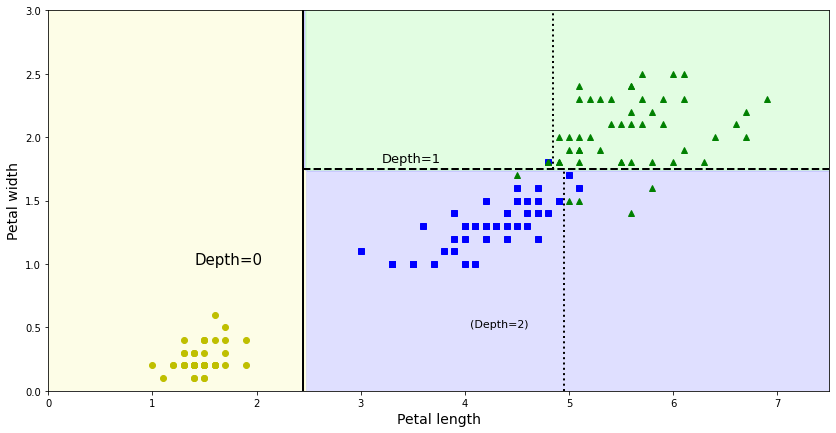

In [103]:
#Nice plot of the decision boundary for our tree

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(14, 7))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

In [104]:
tree_clf.predict_proba([[4,0.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [105]:
tree_clf.predict([[4,2.2]])

array([2])

In [106]:
# Quadratic training set + noise
#perform regression task on this data set with a DT

np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [107]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X,y)

DecisionTreeRegressor(max_depth=2)

In [108]:
tree_reg.predict([[1.1]])

array([0.61460379])

In [109]:
#decision trees always create orthogonal boundaries, so the data is sensitive to rotation
#We can try to limit this issue with PCA

#Exercises:

#Train a decision tree for the moons data set

from sklearn.datasets import make_moons
X, y = make_moons(n_samples=10000, noise=0.4)

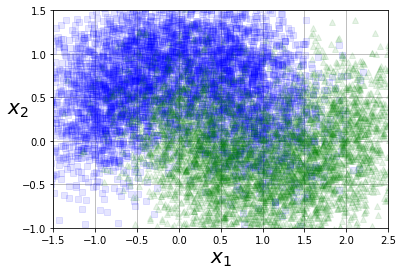

In [110]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", alpha=0.1)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", alpha=0.1)
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
    
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

In [111]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [112]:
from sklearn.model_selection import GridSearchCV

tree_clf = DecisionTreeClassifier()

param_grid = [{
    'max_depth' : list(range(2, 10)),
    'max_leaf_nodes' : [None, 10, 100, 200, 300, 400, 500, 600, 700,800,1000],
    'min_samples_split' : list(range(2,10))
}]

grid_tree = GridSearchCV(tree_clf, param_grid, n_jobs=-1, cv=3)
grid_tree.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid=[{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                          'max_leaf_nodes': [None, 10, 100, 200, 300, 400, 500,
                                             600, 700, 800, 1000],
                          'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9]}])

In [113]:
grid_tree.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_split=6)

In [114]:
from sklearn.metrics import accuracy_score

y_pred = grid_tree.predict(X_test)
accuracy_score(y_test, y_pred)

0.8575

In [115]:
def plot_decision_boundary_new(clf, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

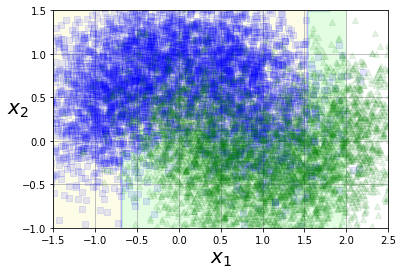

In [116]:
plot_decision_boundary_new(grid_tree,X,y,[-2,2,-2,2])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])